<a href="https://colab.research.google.com/github/A01793509/Equipo38/blob/Prueba/Arboldedecision_Equipo38f_rv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Alberto Jose Garcia Porras (A01793509)
*   Carlos Julio León Caicedo (A01793947)
*   Luis Fernando Ríos Piedra (A00453954)
*   Marco Antonio Vázquez Morales (A01793704)
*   Nicolás Emmanuel Juárez Valenzuela (A01325071).


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [46]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests, zipfile
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer,classification_report
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from io import BytesIO

from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from imblearn.ensemble import BalancedRandomForestClassifier

#**Ejercicio-1.** 

In [2]:
#A continuación cargaremos los datos del ejercicio. En este caso descargamos el archivo 'SouthGermanCredit.asc' desde el repositorio indicado y lo cargamos 
#en la carpeta 'Actividad7' de nuestro repositorio local. Teniendo en cuenta que el archivo viene con separación por espacios, debemos indicar el parámetro 
#'sep=" "' para que lo formatee correctamente.
#df = pd.read_csv("/content/Actividad7/SouthGermanCredit.asc", sep=" ")

#df.head()

#Este metodo es para poder leer directametne desde el zip y directamente de la URL donde esta la zip sin descargar nada

#Defining the zip file URL
ruta = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00522/SouthGermanCredit.zip'

# Split URL to get the file name
archivo = ruta.split('/')[-1]

req = requests.get(ruta)

# extracting the zip file contents
archivo_zip= zipfile.ZipFile(BytesIO(req.content))
archivo_zip.extractall('/content/sample_data/SouthGermanCredit')
df = pd.read_csv("/content/sample_data/SouthGermanCredit/SouthGermanCredit.asc",sep=' ')

df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [3]:
#Una vez cargados los datos en nuestro dataframe, procedemos a cambiar el nombre de las columnas realizando la traducción respectiva de acuerdo a lo indicado 
#en la descripción del dataset. En este caso asignaremos a la lista 'cols_ingles' el nombre que queremos darle a cada columna en el respectivo orden.
cols_ingles = ["status", "duration", "credit_history", "purpose", "amount", "savings", "employment_duration", "installment_rate", "personal_status_sex", 
               "other_debtors", "present_residence", "property", "age", "other_installment_plans", "housing", "number_credits", "job", "people_liable", 
               "telephone", "foreign_worker", "credit_risk"]

#cols_espanol = ["estado", "duracion", "historial_crediticio", "proposito", "monto", "ahorros", "duracion_empleo", "valor_cuota", "estado_personal_sexo", 
#               "otros_deudores", "residencia_actual", "propiedad", "edad", "otros_planes_financiacion", "casa", "numero_de_creditos", "cargo", 
#               "persona_confiable", "telefono", "trabajador_extranjero", "riesgo_credito"]

#Renombramos las columnas asignando la lista con los nombres a la propiedad columns del dataframe
df.columns=cols_ingles
#df.columns=cols_espanol

df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


#**Ejercicio-2.**

In [4]:
#Definimos los atributos de entrada como 'X' y a la variable de salida como 'Y'
X=df.drop('credit_risk',axis=1)

Y=df['credit_risk']


In [5]:
#Particionamos nuestros datos en conjunto de entrenamiento y conjunto de pruebas, ya que no requerimos validación debido al método de validación cruzada que
#utilizaremos. El conjunto de entrenamiento corresponderá al 85% de los datos.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=0.85)

Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 64 to 751
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   850 non-null    int64
 1   duration                 850 non-null    int64
 2   credit_history           850 non-null    int64
 3   purpose                  850 non-null    int64
 4   amount                   850 non-null    int64
 5   savings                  850 non-null    int64
 6   employment_duration      850 non-null    int64
 7   installment_rate         850 non-null    int64
 8   personal_status_sex      850 non-null    int64
 9   other_debtors            850 non-null    int64
 10  present_residence        850 non-null    int64
 11  property                 850 non-null    int64
 12  age                      850 non-null    int64
 13  other_installment_plans  850 non-null    int64
 14  housing                  850 non-null    int64
 15  numbe

#**Ejercicio-3.**

In [6]:
#**********************************************************************************************************************************************************************
#Creamos los pipelines para la imputación, la transformación (escalar) de las variables numéricas y para la transformación One-hot de las variables
#categóricas y binarias:
#**********************************************************************************************************************************************************************
#Almacenamos las variables numéricas en una lista para mayor facilidad en su uso
XNumericas=["age", "amount", "duration"]
#Creamos el pipeline para las numéricas con la imputación utilizando la media y el minmax para escalar los datos numéricos a un rango equiparable
pipeline_numericas = Pipeline(steps = [('impMedia', SimpleImputer(strategy='mean')),('scalar', MinMaxScaler(feature_range=(1,2)))])
#pipeline_numericas = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),('scalar', MinMaxScaler(feature_range=(1,2)))])

#Almacenamos las variables categóricas y ordinales en una lista para mayor facilidad en su uso
XCategoricas=["status","credit_history", "purpose", "savings", "personal_status_sex", "other_debtors",
                                                               "other_installment_plans", "housing"]
#Creamos el pipeline para las categóricas con la imputación utilizando la moda y aplicando la transformación One-Hot
pipeline_categoricas = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(drop='first', handle_unknown='ignore'))])

#Almacenamos las variables binarias en una lista para mayor facilidad en su uso
XBinarias = ["people_liable", "telephone", "foreign_worker"]
#Creamos el pipeline para las categóricas con la imputación utilizando la moda y aplicando la transformación One-Hot
pipeline_binarias = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(drop='first', handle_unknown='ignore'))])


In [8]:
#Justifica que tipo de imputación realizas en cada caso:
#Justifica porque a las variables binarias se les debe aplicar One-Hot Enconding:

In [9]:
#Establecemos a "Columnas_Transformar" como la variable para transformar todas las columnas definidas en el punto anterior, llamando los pipeline creados previamente.
Columnas_Transformar = ColumnTransformer(transformers=[('numericas', pipeline_numericas,XNumericas), ('categoricas', pipeline_categoricas, XCategoricas), 
                                                     ('binarias', pipeline_binarias, XBinarias)]) #remainder='passthrough')
#Aplicamos la transformación de las columnas requeridas (numéricas, categóricas y binarias solamente)
#X_train_fit = Columnas_Transformar.fit(Xtrain)
#pd.DataFrame(X_train_fit.transform(Xtrain))

#**Ejercicio-4.**

In [11]:
#Creamos la función obtener_modelos para utilizarla durante el procesamiento de los datos
def obtener_modelos():
  #Creamos las listas en blanco para almacenar los modelos a utilizar y los nombres de cada modelo
  modelos = list()
  nombres = list()

  #Creamos el registro del modelo de regresión logística en las listas modelo y nombres
  modelos.append(LogisticRegression(max_iter=3000))
  nombres.append('LR')

  #Creamos el registro del modelo de árbol de decisión en las listas modelo y nombres
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')

  #Creamos el registro de Random Forest en las listas modelo y nombres
  modelos.append(RandomForestClassifier())
  nombres.append('RF')
  
  #Devolvemos las listas creadas para el procesamiento respectivo
  return modelos, nombres

In [12]:
#Definimos nuestras funciones de cálculo del score para cada una de las opciones requeridas
#Función para cálculo de accuracy
def mi_accuracy(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  return accuracy

#Función para cálculo de precisión
def mi_precision(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal,ypred).ravel()
  precision = tp/(tp+fp)
  return precision

#Función para cálculo de recall
def mi_recall(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal,ypred).ravel()
  recall = tp/(tp+fn)
  return recall

#Función para cálculo de f1 score
def mi_f1score(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  f1score = (2*tp)/((2*tp)+fp+fn)
  return f1score

#Función para cálculo de gmean
def mi_gmean(yreal, ypred):
    tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
    recall = tp/(tp+fn)
    especificidad = tn/(tn+fp)
    gmean=np.sqrt(recall*especificidad)
    return gmean

In [13]:
#A continuación generamos la validación cruzada para los modelos almacenados en las listas previas e imprimimos las métricas para los
#conjuntos de entrenamiento y validación.

#Se agrega temporalmente para eliminar el warning de división por cero
import warnings
warnings.filterwarnings("ignore")

#Captamos en las variables modelos y nombres, los modelos y descripciones almacenadas en las listas, llamando la función creada previamente.
modelos, nombres = obtener_modelos()

#Creamos una lista en blanco para almacenar el resultado de la iteración
resultados = list()

#Comenzamos a recorrer todos los modelos almacenados en la lista modelos
for i in range(len(modelos)):

  #Definimos los K pliegues que utilizaremos en nuestra validación cruzada, en este caso, 5 divisiones y 3 repeticiones
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  #Creamos nuestro pipeline con los pasos de transformación y ejecución de los modelos
  pipeline = Pipeline(steps=[("ct", Columnas_Transformar), ("m", modelos[i])])

  #Almacenamos las métricas a utilizar en la lista 'mismetricas' y llamamos las funciones de métricas creadas previamente
  mismetricas = {
      "accuracy": make_scorer(mi_accuracy),
      "precision": make_scorer(mi_precision),
      "recall": make_scorer(mi_recall),
      "f1score": make_scorer(mi_f1score),
      "gmean": make_scorer(mi_gmean)

  }

  #Ejecutamos la validación cruzada y almacenamos el resultado en la variable 'resultadosOU'
  resultadosOU = cross_validate(pipeline, Xtrain, Ytrain, scoring=mismetricas, cv=kfold,  
                                return_train_score=True
                                )
  resultados.append(resultadosOU)

  print("Métricas de %s para los datos de entrenamiento:" %nombres[i])
  print("\nmean Accuracy: %.3f \nmean Precision: %.3f \nmean Recall: %.3f \nmean f1score: %.3f \nGmean : %.3f \n" % (
                                               np.mean(resultadosOU["train_accuracy"]),
                                               np.mean(resultadosOU["train_precision"]),
                                               np.mean(resultadosOU["train_recall"]),
                                              np.mean(resultadosOU["train_f1score"]),
                                               np.mean(resultadosOU["train_gmean"])
  ))                  

  print("Métricas de %s para los datos de validación:" %nombres[i])
  print("\nmean Accuracy: %.3f \nmean Precision: %.3f \nmean Recall: %.3f \nmean f1score: %.3f \nGmean : %.3f \n" % (
                                               np.mean(resultadosOU["test_accuracy"]),
                                               np.mean(resultadosOU["test_precision"]),
                                               np.mean(resultadosOU["test_recall"]),
                                               np.mean(resultadosOU["test_f1score"]),
                                               np.mean(resultadosOU["test_gmean"])
  ))                                                    

Métricas de LR para los datos de entrenamiento:

mean Accuracy: 0.780 
mean Precision: 0.804 
mean Recall: 0.907 
mean f1score: 0.853 
Gmean : 0.663 

Métricas de LR para los datos de validación:

mean Accuracy: 0.745 
mean Precision: 0.783 
mean Recall: 0.881 
mean f1score: 0.829 
Gmean : 0.613 

Métricas de DT para los datos de entrenamiento:

mean Accuracy: 1.000 
mean Precision: 1.000 
mean Recall: 1.000 
mean f1score: 1.000 
Gmean : 1.000 

Métricas de DT para los datos de validación:

mean Accuracy: 0.670 
mean Precision: 0.770 
mean Recall: 0.755 
mean f1score: 0.762 
Gmean : 0.593 

Métricas de RF para los datos de entrenamiento:

mean Accuracy: 1.000 
mean Precision: 1.000 
mean Recall: 1.000 
mean f1score: 1.000 
Gmean : 1.000 

Métricas de RF para los datos de validación:

mean Accuracy: 0.737 
mean Precision: 0.776 
mean Recall: 0.878 
mean f1score: 0.824 
Gmean : 0.595 



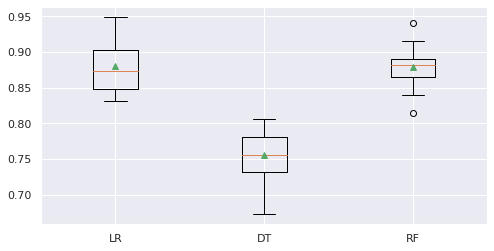

In [14]:
#Se generan los boxplots de los tres modelos utilizando solo la métrica 'recall'
sns.set(rc={'figure.figsize':(8,4)})
bprecall = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_recall']
  bprecall.append(rr)
plt.boxplot(bprecall, labels=nombres, showmeans=True)
plt.show()

✍ A través de los diagramas de caja y bigote podemos determinar que para DT y RF no se visualiza una variación alta en el conjunto de datos, por ende no podríamos determinar si el conjunto está sobreentrenado o subentrenado con estos modelos, por otra parte, para LR, vemos una alta varianza y un sesgo negativo, lo que nos da a entender que el conjunto de datos podría estar sobreentrenado, sin embargo, procederemos a graficar las curvas de aprendizaje para una mejor definición de estos conceptos en el entrenamiento de los modelos.

In [15]:
def get_models_underoversampling():
  models, names = list(), list()

  # RO
  models.append(RandomOverSampler())
  names.append('RandOver')
  # RU
  models.append(RandomUnderSampler())
  names.append('RandUnder')
  # TL
  models.append(TomekLinks())
  names.append('TomekLinks')
  # ENN
  models.append(EditedNearestNeighbours())
  names.append('ENN')
  #SMOTE
  models.append(SMOTE())
  names.append('SMOTE')
  # SMOTEENN
  models.append(SMOTEENN())
  names.append('SMOTEENN')
  #SMOTETek
  models.append(SMOTETomek())
  names.append('SMOTETek')

  
  return models, names

In [16]:
modelos

[LogisticRegression(max_iter=3000),
 DecisionTreeClassifier(),
 RandomForestClassifier()]

In [17]:


modelosOU, nombres = get_models_underoversampling()       
resultados = list()

for i in range(len(modelosOU)):

  model =  RandomForestClassifier()  # ahora probemos con el argumento "balanced"
  
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  pipe = make_pipeline(( modelosOU[i]), ( model))

  metric = {'accuracy':'accuracy', 'recall':'recall', 'gmean':make_scorer(geometric_mean_score),'f1':'f1','precision':'precision' }

  scores = cross_validate(pipe, 
                          Xtrain, Ytrain,
                          scoring=metric,
                          cv=kfold)
  
  resultados.append(scores)

  print('>> %s:\nmean Accuracy: %.3f \nmean Recall: %.3f  \nGmean: %.3f \nF1-Score: %.3f \nPrecision: %.3f' % (nombres[i],
                                                                           np.mean(scores['test_accuracy']), 
                                                                           np.mean(scores['test_recall']),
                                                                           np.mean(scores['test_gmean']),
                                                                           np.mean(scores['test_f1']),
                                                                           np.mean(scores['test_precision'])  
                                                                           ))

>> RandOver:
mean Accuracy: 0.760 
mean Recall: 0.859  
Gmean: 0.672 
F1-Score: 0.833 
Precision: 0.810
>> RandUnder:
mean Accuracy: 0.695 
mean Recall: 0.681  
Gmean: 0.703 
F1-Score: 0.757 
Precision: 0.855
>> TomekLinks:
mean Accuracy: 0.758 
mean Recall: 0.867  
Gmean: 0.658 
F1-Score: 0.834 
Precision: 0.803
>> ENN:
mean Accuracy: 0.652 
mean Recall: 0.602  
Gmean: 0.679 
F1-Score: 0.707 
Precision: 0.861
>> SMOTE:
mean Accuracy: 0.747 
mean Recall: 0.818  
Gmean: 0.688 
F1-Score: 0.819 
Precision: 0.820
>> SMOTEENN:
mean Accuracy: 0.691 
mean Recall: 0.709  
Gmean: 0.676 
F1-Score: 0.762 
Precision: 0.827
>> SMOTETek:
mean Accuracy: 0.749 
mean Recall: 0.821  
Gmean: 0.689 
F1-Score: 0.820 
Precision: 0.821


In [18]:

# REGRESION LOGISTICA
# >> RandOver:
# mean Accuracy: 0.720 
# mean Recall: 0.725  
# Gmean: 0.715 
# F1-Score: 0.784
# >> RandUnder:
# mean Accuracy: 0.712 
# mean Recall: 0.715  
# Gmean: 0.709 
# F1-Score: 0.777
# >> TomekLinks:*******
# mean Accuracy: 0.748 
# mean Recall: 0.853  
# Gmean: 0.651 
# F1-Score: 0.827
# >> ENN:
# mean Accuracy: 0.677 
# mean Recall: 0.641  
# Gmean: 0.697 
# F1-Score: 0.735
# >> SMOTE:
# mean Accuracy: 0.747 
# mean Recall: 0.790  
# Gmean: 0.711 
# F1-Score: 0.814
# >> SMOTEENN:
# mean Accuracy: 0.685 
# mean Recall: 0.691  
# Gmean: 0.678 
# F1-Score: 0.755
# >> SMOTETek:
# mean Accuracy: 0.740 
# mean Recall: 0.776  
# Gmean: 0.711 
# F1-Score: 0.807

In [19]:

#DECISION TREE
# >> RandOver:
# mean Accuracy: 0.679 
# mean Recall: 0.773  
# Gmean: 0.592 
# F1-Score: 0.772 
# Precision: 0.772
# >> RandUnder:
# mean Accuracy: 0.624 
# mean Recall: 0.622  
# Gmean: 0.624 
# F1-Score: 0.699 
# Precision: 0.800
# >> TomekLinks:
# mean Accuracy: 0.655 
# mean Recall: 0.720  
# Gmean: 0.597 
# F1-Score: 0.746 
# Precision: 0.776
# >> ENN:****
# mean Accuracy: 0.602 
# mean Recall: 0.557  
# Gmean: 0.626 
# F1-Score: 0.663 
# Precision: 0.821
# >> SMOTE:
# mean Accuracy: 0.689 
# mean Recall: 0.751  
# Gmean: 0.636 
# F1-Score: 0.772 
# Precision: 0.795
# >> SMOTEENN:
# mean Accuracy: 0.653 
# mean Recall: 0.681  
# Gmean: 0.629 
# F1-Score: 0.732 
# Precision: 0.797
# >> SMOTETek:
# mean Accuracy: 0.686 
# mean Recall: 0.749  
# Gmean: 0.633 
# F1-Score: 0.770 
# Precision: 0.793

In [20]:
#RANDOM FOREST

# >> RandOver:
# mean Accuracy: 0.756 
# mean Recall: 0.858  
# Gmean: 0.662 
# F1-Score: 0.832 
# Precision: 0.808
# >> RandUnder:
# mean Accuracy: 0.690 
# mean Recall: 0.671  
# Gmean: 0.700 
# F1-Score: 0.752 
# Precision: 0.859
# >> TomekLinks:******
# mean Accuracy: 0.756 
# mean Recall: 0.870  
# Gmean: 0.648 
# F1-Score: 0.834 
# Precision: 0.800
# >> ENN:
# mean Accuracy: 0.656 
# mean Recall: 0.601  
# Gmean: 0.686 
# F1-Score: 0.711 
# Precision: 0.869
# >> SMOTE:
# mean Accuracy: 0.748 
# mean Recall: 0.823  
# Gmean: 0.683 
# F1-Score: 0.821 
# Precision: 0.821
# >> SMOTEENN:
# mean Accuracy: 0.689 
# mean Recall: 0.716  
# Gmean: 0.666 
# F1-Score: 0.763 
# Precision: 0.820
# >> SMOTETek:
# mean Accuracy: 0.737 
# mean Recall: 0.802  
# Gmean: 0.683 
# F1-Score: 0.811 
# Precision: 0.821

In [21]:
def mi_PlotCurvaAprendizaje(ModeloTipo, train_sizes, train_scores, val_scores, TipoImpresion):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    if TipoImpresion=="Incremental":
      plt.title('Curvas de Aprendizaje incremental')
      plt.xlabel('Tamaño del conjunto de entrenamiento')
    else:
      plt.title('Curvas de Aprendizaje')
      plt.xlabel('Tamaño del conjunto de entrenamiento')

    #Si es Random Forrest utilizamos la métrica recall, para los otros utilizamos la métrica F1 score
    if ModeloTipo=="RF":
      plt.ylabel('recall')
    else:
      plt.ylabel('F1 score')

    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [22]:
def mi_CurvaAprendizaje(ModeloTipo, ModeloCurva, Xcurva, ycurva, TipoImpresion):

  #Capturamos la curva a graficar
  MiModelo = ModeloCurva

  #Aplicamos la transformación según lo definido previamente
  ColsX = Columnas_Transformar.fit(Xcurva)
  TransX = ColsX.transform(Xcurva)

  #Definimos los K pliegues que utilizaremos en nuestra validación cruzada, en este caso, 5 divisiones y 3 repeticiones
  mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)


  #Creamos un arreglo con los 20 valores de los tamaños de muestra:
  delta_train_sz = np.linspace(0.1, 1.0, 20)


  #Ejecutamos la función learning curve para capturar las variables tr_sizes, tr_scores y val_scores, que posteriormente utilizaremos en la graficación
  if (ModeloTipo == "LR"):
    #Si el modelo es LR utilizaremos la métrica f1 
    tr_sizes, tr_scores, val_scores = learning_curve(estimator = MiModelo,    
                                                      X = TransX,
                                                      y = ycurva,
                                                      cv = mi_kfold ,
                                                      train_sizes = delta_train_sz ,
                                                      random_state=0,
                                                      scoring=make_scorer(mi_f1score))
  elif (ModeloTipo == "RF"):
    #Si el modelo es LR utilizaremos la métrica recall 
    tr_sizes, tr_scores, val_scores = learning_curve(estimator = MiModelo,    
                                                      X = TransX,
                                                      y = ycurva,
                                                      cv = mi_kfold ,
                                                      train_sizes = delta_train_sz ,
                                                      random_state=0,
                                                      scoring=make_scorer(mi_recall))

  #Enviamos a nuestra función de graficación los valores obtenidos y esperamos que nos genere las curvas de aprendizaje:
  mi_PlotCurvaAprendizaje(ModeloTipo, tr_sizes, tr_scores, val_scores, TipoImpresion)

In [23]:
def mi_CurvaValidacion(ModeloCurva, Xcurva, ycurva):
  
  #Capturamos la curva a graficar
  MiModelo = ModeloCurva

  #Aplicamos la transformación según lo definido previamente
  ColsX = Columnas_Transformar.fit(Xcurva)
  TransX = ColsX.transform(Xcurva)

  #Definimos los K pliegues que utilizaremos en nuestra validación cruzada, en este caso, 5 divisiones y 3 repeticiones
  mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

  #Ejecutamos la función validation curve para capturar las variables tr_scores y val_scores, que posteriormente utilizaremos en la graficación
  #Según lo indicado utilizaremos la métrica f1 para el modelo DT 
  tr_scores, val_scores = validation_curve(estimator = MiModelo,    
                                                        X = TransX,
                                                        y = Ytrain,
                                                        cv = mi_kfold ,
                                                        param_name='max_depth',
                                                        param_range=np.arange(1, 20),
                                                        scoring=make_scorer(mi_f1score))

  #Calculamos las variables requeridas para la graficación

  #Obtenemos la media para las métricas en el conjunto de entrenamiento
  train_mean = np.mean(tr_scores, axis=1)
  #Obtenemos la desviación estandar para las métricas en el conjunto de entrenamiento
  train_std = np.std(tr_scores, axis=1)

  #Obtenemos la media para las métricas en el conjunto de pruebas
  test_mean = np.mean(val_scores, axis=1)
  #Obtenemos la desviación estandar para las métricas en el conjunto de pruebas
  test_std = np.std(val_scores, axis=1)

  #Definimos el rango en el cual graficaremos la curva de validación
  param_range = np.arange(1, 20, 1)

  #Comenzamos la graficación de la curva
  plt.subplots(1, figsize=(7,7))
  plt.plot(param_range, train_mean, label="Training", color="blue")
  plt.plot(param_range, test_mean, label="Validation", color="red")

  plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
  plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

  plt.title("Curva de Validación")
  plt.xlabel("Número de árboles")
  plt.ylabel("F1 Score")
  plt.tight_layout()
  plt.legend(loc="best")
  plt.show()

In [26]:
for i in range(len(modelos)):
  if nombres[i]=="DT":
    print('Curvas de validación del modelo %s'%nombres[i])
    mi_CurvaValidacion(modelos[i], Xtrain, Ytrain)
  else:
    print('Curvas de aprendizaje del modelo %s'%nombres[i])
    mi_CurvaAprendizaje(nombres[i], modelos[i], Xtrain, Ytrain, "Normal")

Curvas de aprendizaje del modelo RandOver


UnboundLocalError: ignored

In [ ]:
#Agregar comentarios respecto a cada una de las cruvas:

#**Ejercicio-5.**

In [30]:

#a. REGRESION LOGISTICA -Buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este casodeberás usar la métrica (scoring) “f1-score”

XtrainTf = Columnas_Transformar.fit(Xtrain)
XtrainFTf = XtrainTf.transform(Xtrain)   
XtestFTf = XtrainTf.transform(Xtest)




modelo_LRf = LogisticRegression(max_iter=8000)

penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,0.9,1.0]
class_weight=[None,'balanced']
solver= ['newton-cg','lbfgs','liblinear','sag','saga']

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
grid_model_LR = GridSearchCV(modelo_LRf,param_grid={'C':C,'penalty':penalty,'solver':solver,'class_weight':class_weight},cv=cv,scoring='f1')

grid_model_LR.fit(XtrainFTf,Ytrain)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=LogisticRegression(max_iter=8000),
             param_grid={'C': [0.001, 0.01, 0.1, 0.9, 1.0],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

Cuál es la utilidad de la métrica F1-Score?

In [31]:
#a. REGRESION LOGISTICA - impresion de la mejor combinación de parámetros
grid_model_LR.best_params_

{'C': 1.0, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}

In [32]:
lrc=grid_model_LR.predict(XtestFTf)
print(classification_report(Ytest,lrc))

              precision    recall  f1-score   support

           0       0.65      0.38      0.48        45
           1       0.77      0.91      0.84       105

    accuracy                           0.75       150
   macro avg       0.71      0.65      0.66       150
weighted avg       0.74      0.75      0.73       150



In [ ]:
print(classification_report_imbalanced(Ytest,lrc))

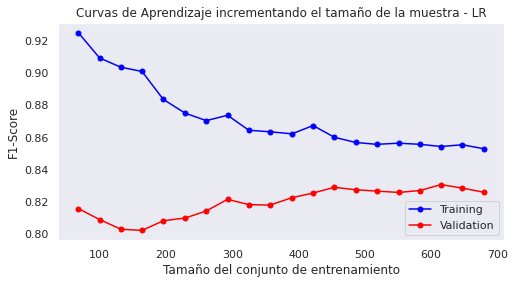

In [34]:
#b. REGRESIOIN LOGÍSTICA - curvas de aprendizaje usando los mejoes valores usanod métrica f1-score 

XtrainTf = Columnas_Transformar.fit(Xtrain)
XtrainFTf = XtrainTf.transform(Xtrain)   
XtestFTf = XtrainTf.transform(Xtest)


delta_train_sz = np.linspace(.1, 1.0, 20)
LR_grid_res=LogisticRegression(max_iter=8000,C=0.9,penalty='l2',solver='lbfgs',class_weight=None)


tr_sizes,tr_scores, val_scores = learning_curve(LR_grid_res,    
                                                        X = XtrainFTf,
                                                        y = Ytrain,
                                                        cv = cv ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring='f1'
                                                        )

train_mean = np.mean(tr_scores, axis=1)
train_std = np.std(tr_scores, axis=1)
valid_mean = np.mean(val_scores, axis=1)
valid_std = np.std(val_scores, axis=1)


# Curva de entrenamiento con la métrica de exactitud (F1-Score):
plt.plot(tr_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(tr_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra - LR')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('F1-Score')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [35]:
#c. DECISION TREE - Buscando los mejores hiperparámetros, debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “precision”.

modelo_DT=DecisionTreeClassifier()

criterion=["gini", "entropy","log_loss"]
max_depth=np.arange(4,9)
min_samples_split=np.arange(2,5)
class_weight=[None,'balanced']
ccp_alpha=np.round(np.linspace(0,0.1,4),2)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

grid_modelo_DT=GridSearchCV(modelo_DT,param_grid={'criterion':criterion,'max_depth':max_depth,
                                                 'min_samples_split':min_samples_split,'class_weight':class_weight,
                                                 'ccp_alpha':ccp_alpha},cv=cv,scoring='precision')

grid_modelo_DT.fit(Xtrain,Ytrain)



GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.  , 0.03, 0.07, 0.1 ]),
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([4, 5, 6, 7, 8]),
                         'min_samples_split': array([2, 3, 4])},
             scoring='precision')

Cuál es la utilidad de la métrica Precision?

In [65]:
#c. DECISION TREE - Impresion de los mejor combianción de parámetros
grid_modelo_DT.best_params_

{'ccp_alpha': 0.03,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'min_samples_split': 2}

In [37]:
dtc=grid_modelo_DT.predict(Xtest)
print(classification_report(Ytest,dtc))

              precision    recall  f1-score   support

           0       0.47      0.84      0.61        45
           1       0.90      0.60      0.72       105

    accuracy                           0.67       150
   macro avg       0.69      0.72      0.66       150
weighted avg       0.77      0.67      0.69       150



In [66]:
print(classification_report_imbalanced(Ytest,dtc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.47      0.84      0.60      0.61      0.71      0.52        45
          1       0.90      0.60      0.84      0.72      0.71      0.49       105

avg / total       0.77      0.67      0.77      0.69      0.71      0.50       150



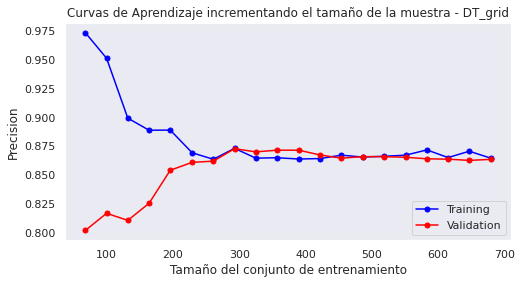

In [38]:
#d. DECISION TREE - Cruva de aprendizaje con los mejores valores de los hiperparámetros encontrados con la métrica “precision”
delta_train_sz = np.linspace(.1, 1.0, 20)
DT_grid_res=DecisionTreeClassifier(ccp_alpha=0.03,class_weight= 'balanced',criterion='gini',
                                   max_depth=4, min_samples_split=2)

tr_sizes,tr_scores, val_scores = learning_curve(DT_grid_res,    
                                                        X = Xtrain,
                                                        y = Ytrain,
                                                        cv = cv ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring='precision'
                                                        )
train_mean = np.mean(tr_scores, axis=1)
train_std = np.std(tr_scores, axis=1)
valid_mean = np.mean(val_scores, axis=1)
valid_std = np.std(val_scores, axis=1)


# Curva de entrenamiento con la métrica de exactitud (F1-Score):
plt.plot(tr_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(tr_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra - DT_grid')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precision')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [70]:
#e. Realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). 
#Buscando los mejores hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight
modelo_RFi = RandomForestClassifier()

# resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# Xtrain_f,Ytrain_f=resample.fit_resample(Xtrain,Ytrain)


criterion=["gini", "entropy"]
max_depth=np.arange(33,39)
min_samples_split=[2,5]
class_weight=[None,'balanced']
ccp_alpha=np.round(np.linspace(0,0.2,4),2)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

grid_modelo_RFi=GridSearchCV(modelo_RFi,param_grid={'criterion':criterion,'max_depth':max_depth,
                                                 'min_samples_split':min_samples_split,'class_weight':class_weight,
                                                 'ccp_alpha':ccp_alpha},cv=cv,scoring='recall')

grid_modelo_RFi.fit(Xtrain_f,Ytrain_f)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': array([0.  , 0.07, 0.13, 0.2 ]),
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([33, 34, 35, 36, 37, 38]),
                         'min_samples_split': [2, 5]},
             scoring='recall')

In [71]:
#e. Impresión de los mejores parámetros
grid_modelo_RFi.best_params_

{'ccp_alpha': 0.07,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 33,
 'min_samples_split': 2}

In [72]:
rfc=grid_modelo_RFi.predict(Xtest)
print(classification_report(Ytest,rfc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.70      1.00      0.82       105

    accuracy                           0.70       150
   macro avg       0.35      0.50      0.41       150
weighted avg       0.49      0.70      0.58       150



In [73]:
print(classification_report_imbalanced(Ytest,rfc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      1.00      0.00      0.00      0.00        45
          1       0.70      1.00      0.00      0.82      0.00      0.00       105

avg / total       0.49      0.70      0.30      0.58      0.00      0.00       150



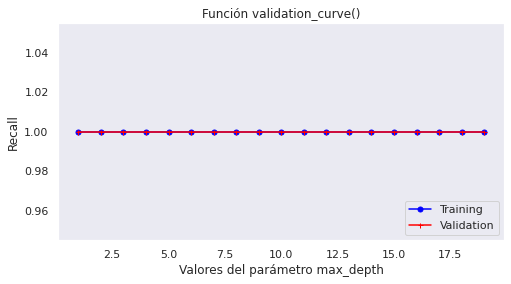

In [74]:
#f. Curva de validación usando los mejores parámetros, max_depth incrementando 10 valores
delta_C=np.arange(1,20)
Ran_grid_resi=RandomForestClassifier(ccp_alpha=0.07,class_weight=None,criterion='gini',max_depth=33,min_samples_split=2)

train_scores, valid_scores = validation_curve(Ran_grid_resi, 
                                              Xtrain, 
                                              Ytrain,
                                              param_name="max_depth", 
                                              param_range=delta_C,
                                              cv=cv,
                                              scoring='recall')


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)


# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_C, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_C, valid_mean, color='red', marker='+', markersize=5, label='Validation',)

plt.title('Función validation_curve()')
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('Recall')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [58]:
#e_alt. Realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). 
#Buscando los mejores hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight
modelo_RF = BalancedRandomForestClassifier()

# resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# Xtrain_f,Ytrain_f=resample.fit_resample(Xtrain,Ytrain)


criterion=["gini", "entropy"]
max_depth=np.arange(33,39)
min_samples_split=[2,5]
class_weight=[None,'balanced']
ccp_alpha=np.round(np.linspace(0,0.2,4),2)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

In [59]:
grid_modelo_RF=GridSearchCV(modelo_RF,param_grid={'criterion':criterion,'max_depth':max_depth,
                                                 'min_samples_split':min_samples_split,'class_weight':class_weight,
                                                 'ccp_alpha':ccp_alpha},cv=cv,scoring='recall')

grid_modelo_RF.fit(Xtrain_f,Ytrain_f)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=BalancedRandomForestClassifier(),
             param_grid={'ccp_alpha': array([0.  , 0.07, 0.13, 0.2 ]),
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([33, 34, 35, 36, 37, 38]),
                         'min_samples_split': [2, 5]},
             scoring='recall')

Cuál es la utilidad de la métrica Recall?

In [60]:
#e. Impresión de los mejores parámetros
grid_modelo_RF.best_params_


{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 36,
 'min_samples_split': 2}

In [61]:
rfc=grid_modelo_RF.predict(Xtest)
print(classification_report(Ytest,rfc))

              precision    recall  f1-score   support

           0       0.64      0.56      0.60        45
           1       0.82      0.87      0.84       105

    accuracy                           0.77       150
   macro avg       0.73      0.71      0.72       150
weighted avg       0.77      0.77      0.77       150



In [62]:
print(classification_report_imbalanced(Ytest,rfc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.64      0.56      0.87      0.60      0.69      0.47        45
          1       0.82      0.87      0.56      0.84      0.69      0.50       105

avg / total       0.77      0.77      0.65      0.77      0.69      0.49       150



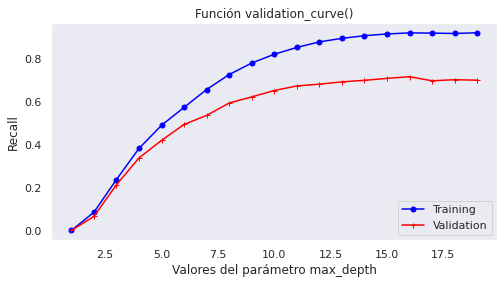

In [68]:
#f. Curva de validación usando los mejores parámetros, max_depth incrementando 10 valores
delta_C=np.arange(1,20)
Ran_grid_res=BalancedRandomForestClassifier(ccp_alpha=0.0,class_weight='balanced',criterion='gini',max_depth=36,min_samples_split=2)

train_scores, valid_scores = validation_curve(Ran_grid_res, 
                                              Xtrain, 
                                              Ytrain,
                                              param_name="max_depth", 
                                              param_range=delta_C,
                                              cv=cv,
                                              scoring='recall')


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)


# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_C, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_C, valid_mean, color='red', marker='+', markersize=5, label='Validation',)

plt.title('Función validation_curve()')
plt.xlabel('Valores del parámetro max_depth')
plt.ylabel('Recall')
plt.grid()
plt.legend(loc='lower right')
plt.show()

#**Ejercicio-6.**

In [ ]:
#Deberás usar además como conjunto de entrenamiento el llamado modelo de entrenamiento “aumentado” 

a. Obtener el modelo de regresión logística con los mejores parámetros que hayas
encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye
tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final
obtenido. 


b. Obtener el modelo de árbol de decisiones con los mejores parámetros que hayas
encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e
incluye tus conclusiones finales para este caso. 


c. Obtener el modelo de bosque aleatorio con los mejores parámetros que hayas
encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye
tus conclusiones finales para este caso. 

###**Fin de la Actividad de la semana 6.**